In [6]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [7]:
folder="${fastMCKalman}/data/testTPCmuons/fixedpt15/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_00005smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


In [8]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31")
#part.fStatusMaskIn.fData[1]==31



True

Warning in <TROOT::Append>: Replacing existing TH1: hdeltaE (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cstatus


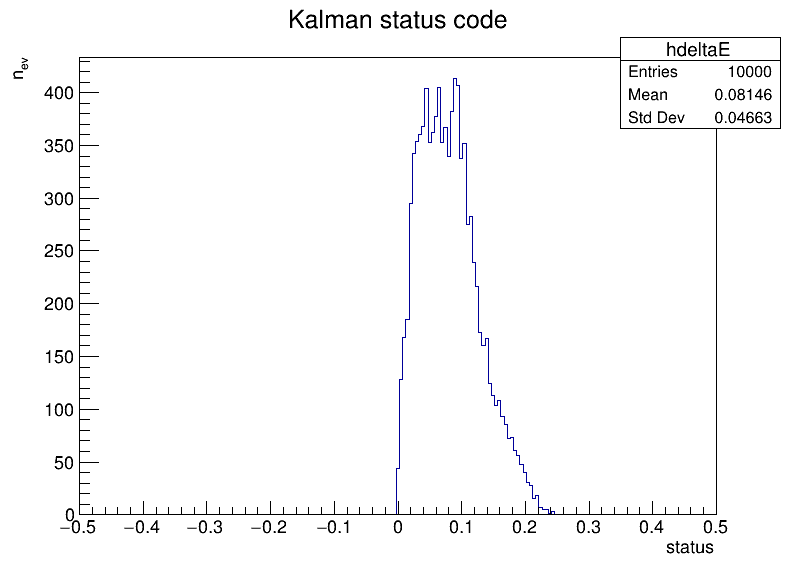

In [9]:
hdeltaE   = ROOT.TH1D( 'hdeltaE', 'hdeltaE', 201, -0.5, 0.5 )

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    size = tree.part.fParamMC.size()
    pstart = tree.part.fParamMC[1].GetP()
    pend = tree.part.fParamMC[size-1].GetP()
    #print(pstart-pend)
    hdeltaE.Fill(pstart-pend)

#gStyle.SetOptStat(1)
cstatus = ROOT.TCanvas("cstatus","cstatus",800,600)
hdeltaE.SetTitle("Kalman status code;status;n_{ev}")
hdeltaE.Draw()
cstatus.Draw()
save=folder+"status"+".png"
#cstatus.Print(save)

Warning in <TROOT::Append>: Replacing existing TH1: hdeltaEr (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cstatus


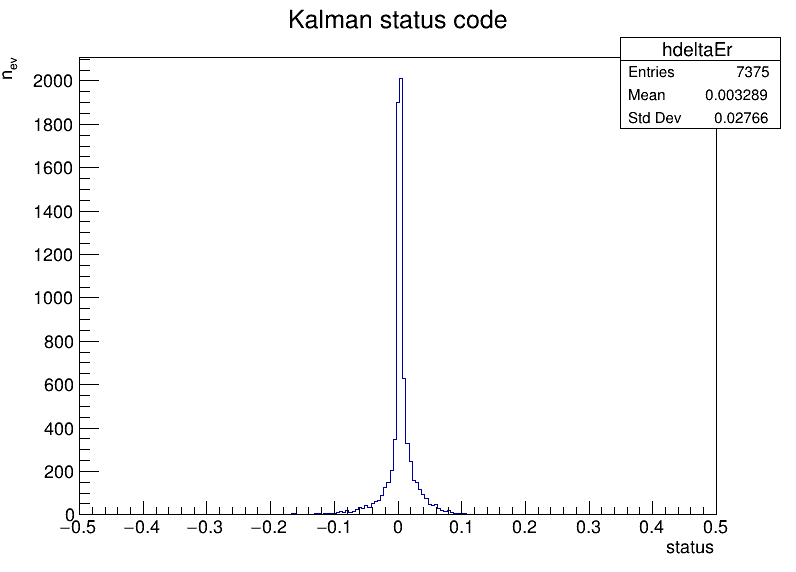

In [10]:
hdeltaEr   = ROOT.TH1D( 'hdeltaEr', 'hdeltaEr', 201, -0.5, 0.5 )

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    size = tree.part.fParamIn.size()
    if(size==0): continue
    pstart = tree.part.fParamIn[1].GetP()
    pend = tree.part.fParamIn[size-1].GetP()
    status=0
    for i in range(size):
        status = tree.part.fStatusMaskIn[size-i-1]
        if(i!=0 and status!=31):
            #print(status)
            break
    if (status!=31) : continue
    #print(pstart-pend)
    hdeltaEr.Fill(pstart-pend)

#gStyle.SetOptStat(1)
cstatus = ROOT.TCanvas("cstatus","cstatus",800,600)
hdeltaEr.SetTitle("Kalman status code;status;n_{ev}")
hdeltaEr.Draw()
cstatus.Draw()
save=folder+"status"+".png"
#cstatus.Print(save)